In [1]:
#import pyscamp
from obspy import read, UTCDateTime, Stream
import os
import numpy as np
import sys
import time
from glob import glob
from MPLib import *
from GraphLib import *
from util import *

In [22]:
import pyscamp

print(trace)
fs = 250.0
sublen_samp = int(0.5 * fs)

proc_start = time.time()

#mp, mpind = pyscamp.selfjoin(trace.data, sublen_samp, gpus=[0, 1, 2, 3], pearson=True, precision="double")

k = 5
threshold = 0.7
tuples = pyscamp.selfjoin_knn(trace.data, sublen_samp, 5, gpus=[0, 1, 2, 3], pearson=True, precision="double")

proc_end = time.time()

print("Finished processing component in %f seconds" % (proc_end - proc_start))



BH.G12..DPZ | 2020-02-18T00:00:00.000000Z - 2020-02-18T23:59:59.996000Z | 250.0 Hz, 21600000 samples
Finished processing component in 2167.917141 seconds


In [21]:
proc_start = time.time()
mp, mpind = pyscamp.selfjoin(trace.data, sublen_samp, gpus=[0, 1, 2, 3], pearson=True, precision="double")
proc_end = time.time()
print("Finished processing component in %f seconds" % (proc_end - proc_start))


Finished processing component in 1928.849877 seconds


In [ ]:
#import pyscamp
# wf_dir = "/home/gilbert_lab/cami_frs/borehole_data/sac_daily_500Hz/"
# starttime = UTCDateTime(2020, 2, 18, 0, 0, 0)
# endtime = UTCDateTime(2020, 2, 19, 0, 0, 0)

# def get_mp(data, sublen_samp):
#     proc_start = time.time()
#     mp, mpind = pyscamp.selfjoin(data, sublen_samp, gpus=[0, 1, 2, 3], pearson=True, precision="double")
#     proc_end = time.time()
#     print("Finished processing component in %f seconds" % (proc_end - proc_start))
#     return mp, mpind

# fs = 250.0
# print(fs)

# # Define window
# sublen_sec = 0.5
# sublen_samp = int(0.5 * fs)
# trace1 = get_stream(station="G12", channel="DP1", starttime=starttime, endtime=endtime, fs=fs)
# mp1, mpind1 = get_mp(data=trace1.data, sublen_samp=sublen_samp)

# sublen_samp = int(0.5 * fs)
# trace2 = get_stream(station="G12", channel="DP2", starttime=starttime, endtime=endtime, fs=fs)
# mp2, mpind2 = get_mp(data=trace2.data, sublen_samp=sublen_samp)

# sublen_samp = int(0.5 * fs)
# trace3 = get_stream(station="G12", channel="DP3", starttime=starttime, endtime=endtime, fs=fs)
# mp3, mpind3 = get_mp(data=trace3.data, sublen_samp=sublen_samp)

# # Save time array
# # t = trace1.times("matplotlib")

# # Get stack
# stack = (mp1 + mp2 + mp3)/3

In [2]:
from util import get_stream_1day
from MPLib import *

starttime=UTCDateTime(2020,2,18,0,0,0)
endtime = starttime+86400
trace = get_stream_1day("G12", "DPZ", starttime=starttime, endtime=endtime, fs=250.0, gain=1e18)
print(trace)

fname_mp = "20200218000000.000000_20200218235959.996000_G12_DPZ_250Hz_win125samp_mp.npy"
fname_ind = fname_mp.replace("_mp", "_ind")

input_dir = "/home/genevieve.savard/seismo-pyscamp/data_borehole/matrix_profiles"
mp = np.load(os.path.join(input_dir, fname_mp))
ind = np.load(os.path.join(input_dir, fname_ind))

station = os.path.split(fname_mp)[1].split("_")[2]
channel = os.path.split(fname_mp)[1].split("_")[3]
print("Station %s, channel %s" % (station, channel))
starttime = UTCDateTime(os.path.split(fname_mp)[1].split("_")[0])
endtime = UTCDateTime(os.path.split(fname_mp)[1].split("_")[1])
fs = float(os.path.split(fname_mp)[1].split("_")[4].split("Hz")[0])
print("Start time %s" % starttime)
print("End time %s" % endtime)
print("Sampling rate: %s" % fs)

sublen_samp = int(os.path.split(fname_mp)[1].split("_")[5].split("win")[1].split("samp")[0])
print("sublen_samp = %d" % sublen_samp)
print("Length of MP: %d samples" % mp.shape[0])

mpObj = MatrixProfile(mp=mp, ind=ind, trace=trace, sublen=sublen_samp)
                      #station=station, channel=channel, fs=fs, sublen=sublen_samp,
                      #starttime=starttime, endtime=endtime)

#mpObj.get_peaks()
#mpObj.group_ids(tol=100)
# %matplotlib inline
# mpObj.mp_starttime = mpObj.starttime + mpObj.sublen/mpObj.fs
# mpObj.plot_all_pairs(outdir=".")


BH.G12..DPZ | 2020-02-18T00:00:00.000000Z - 2020-02-18T23:59:59.996000Z | 250.0 Hz, 21600000 samples
Station G12, channel DPZ
Start time 2020-02-18T00:00:00.000000Z
End time 2020-02-18T23:59:59.996000Z
Sampling rate: 250.0
sublen_samp = 125
Length of MP: 21599876 samples


In [4]:
mpObj.get_peaks()
mpObj.group_ids(tol=100)
# %matplotlib inline
# mpObj.mp_starttime = mpObj.starttime + mpObj.sublen/mpObj.fs
# mpObj.plot_all_pairs(outdir=".")

for igroup, group in enumerate(mpObj.groups):
    dfg = mpObj.pairs.loc[mpObj.pairs["group_idx"] == igroup]
    indices = np.unique(np.hstack((dfg["Index1"], dfg["Index2"])))
    print("Group # %d: %d detections" % (igroup, len(indices)))

Group # 0: 8743 detections
Group # 1: 45 detections
Group # 2: 41 detections
Group # 3: 16 detections
Group # 4: 11 detections
Group # 5: 10 detections
Group # 6: 8 detections
Group # 7: 8 detections
Group # 8: 8 detections
Group # 9: 4 detections
Group # 10: 2 detections
Group # 11: 2 detections
Group # 12: 2 detections
Group # 13: 2 detections
Group # 14: 2 detections
Group # 15: 2 detections
Group # 16: 2 detections
Group # 17: 2 detections
Group # 18: 2 detections
Group # 19: 2 detections
Group # 20: 2 detections
Group # 21: 2 detections


In [8]:
import sknetwork as skn
from sknetwork.visualization import svg_graph

net = skn.data.bow_tie
net.plot()

AttributeError: 'function' object has no attribute 'plot'

BH.G12..DPZ | 2020-02-18T00:00:00.000000Z - 2020-02-18T23:59:59.996000Z | 250.0 Hz, 21600000 samples
sublen_samp = 125


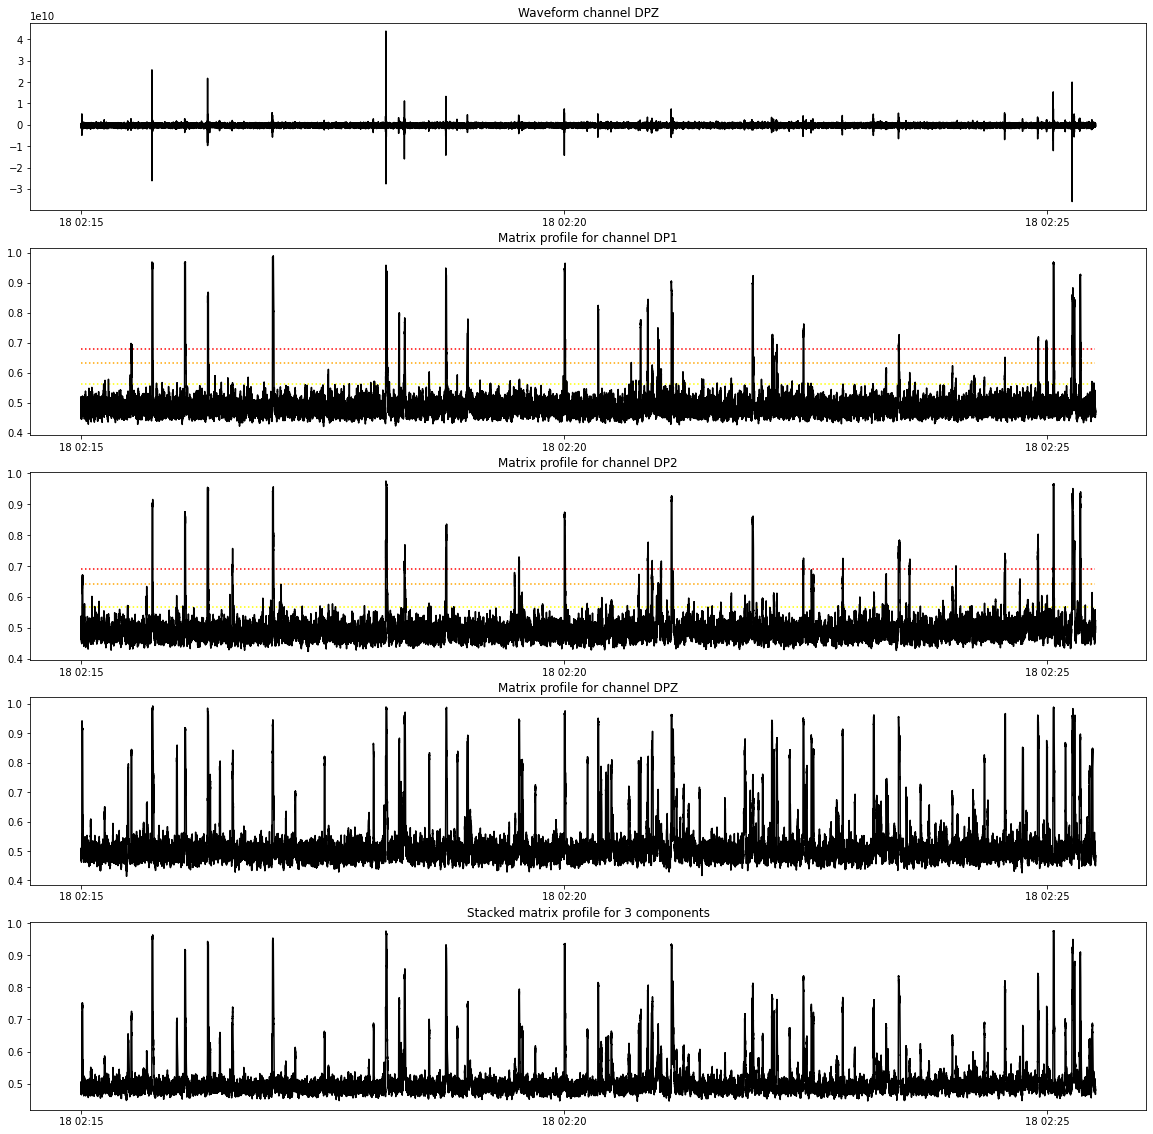

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from statsmodels.robust import mad
from util import get_stream_1day
from MPLib import *
from obspy import read, UTCDateTime, Stream
import os
import numpy as np
import sys
import time
from glob import glob
import gc
gc.collect()

starttime=UTCDateTime(2020,2,18,0,0,0)
endtime = starttime+86400
trace = get_stream_1day("G12", "DPZ", starttime=starttime, endtime=endtime, fs=250.0, gain=1e18)
print(trace)


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

input_dir = "/home/genevieve.savard/seismo-pyscamp/data_borehole/matrix_profiles"
#input_dir = "/home/genevieve.savard/seismo-pyscamp"
fname_mp = os.path.join(input_dir, "20200218000000.000000_20200218235959.996000_G12_DPZ_250Hz_win125samp_mp.npy")
sublen_samp = int(os.path.split(fname_mp)[1].split("_")[5].split("win")[1].split("samp")[0])
print("sublen_samp = %d" % sublen_samp)
mp3 = np.load(fname_mp)
mp1 = np.load(fname_mp.replace("DPZ", "DPN"))
mp2 = np.load(fname_mp.replace("DPZ", "DPE"))

mp3[mp3>1] = None

t = trace.times("matplotlib")
datac = trace.data[sublen_samp-1:]
tc = t[sublen_samp-1:]
stack = (mp1 + mp2 + mp3 + mp3)/4

# Window for plotting
# t1 = tc[0]
# t2 = tc[-1]
t1 = mdates.date2num(UTCDateTime(2020, 2, 18, 2, 15, 0).datetime)
t2 = mdates.date2num(UTCDateTime(2020, 2, 18, 2, 25, 30).datetime)
_, idx1 = find_nearest(tc, t1)
_, idx2 = find_nearest(tc, t2)

fig, axs = plt.subplots(5,1, figsize=(20,20))
axs[0].plot_date(tc[idx1:idx2], datac[idx1:idx2], "k")
axs[0].set_title("Waveform channel DPZ")
axs[1].plot_date(tc[idx1:idx2], mp1[idx1:idx2], "k")
axs[1].set_title("Matrix profile for channel DP1")
axs[2].plot_date(tc[idx1:idx2], mp2[idx1:idx2], "k")
axs[2].set_title("Matrix profile for channel DP2")
axs[3].plot_date(tc[idx1:idx2], mp3[idx1:idx2], "k")
axs[3].set_title("Matrix profile for channel DPZ")
axs[4].plot_date(tc[idx1:idx2], stack[idx1:idx2], "k")
axs[4].set_title("Stacked matrix profile for 3 components")
for ax, mp in zip([axs[1], axs[2], axs[3], axs[4]], [mp1, mp2, mp3, stack]):
    ax.hlines(np.median(mp) + 3*mad(mp), xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="yellow")
    ax.hlines(np.median(mp) + 6*mad(mp), xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="orange")
    ax.hlines(np.median(mp) + 8*mad(mp), xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="red")


Text(0.5, 1.0, 'Matching indices')

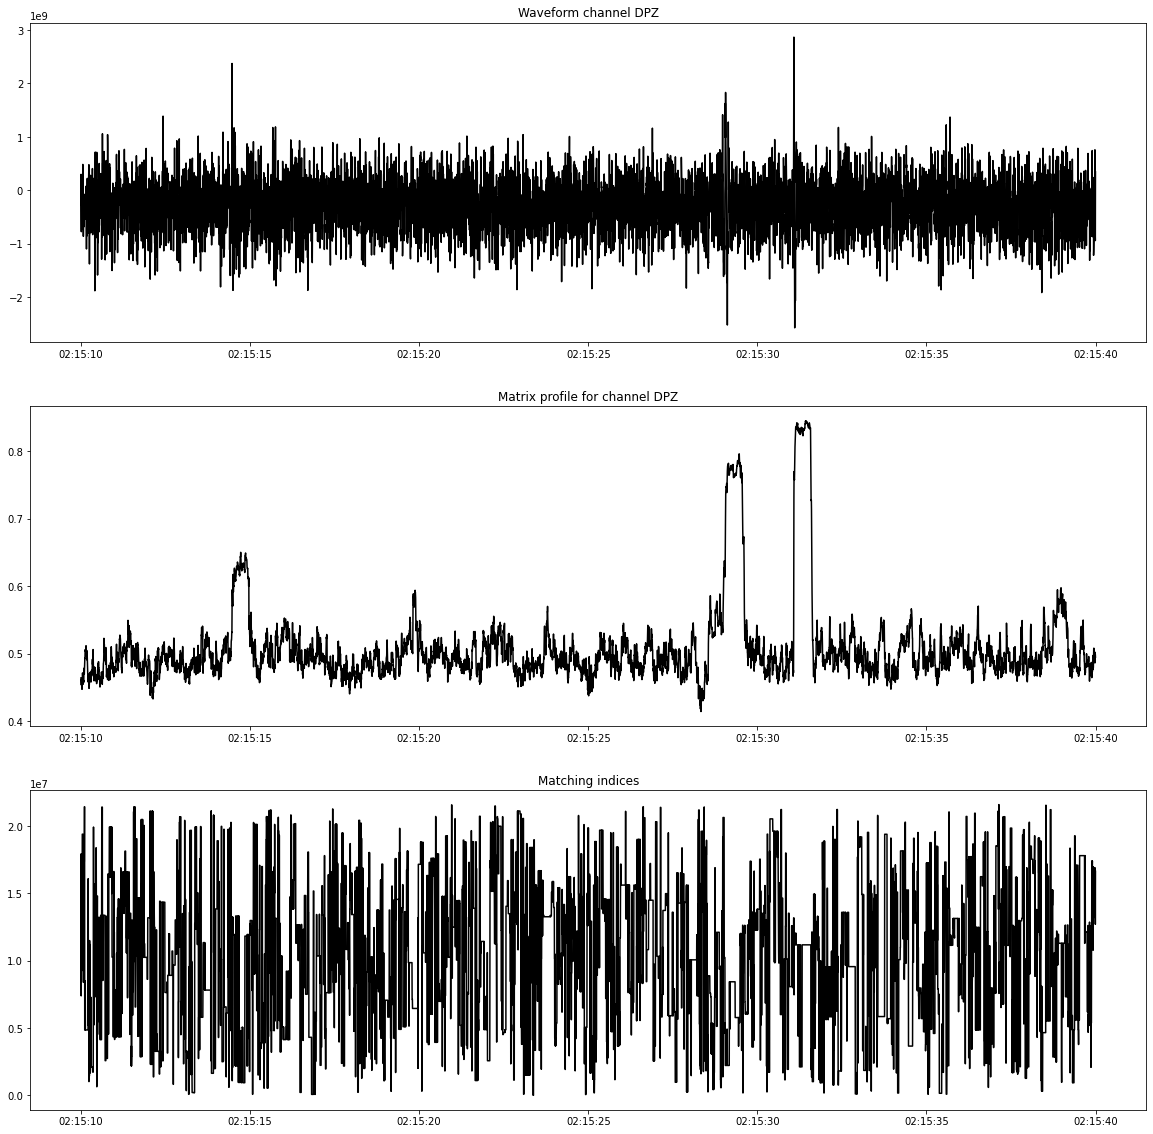

In [5]:
#ind3 = np.load(fname_mp.replace("_mp", "_ind"))

t1 = mdates.date2num(UTCDateTime(2020, 2, 18, 2, 15, 10).datetime)
t2 = mdates.date2num(UTCDateTime(2020, 2, 18, 2, 15, 40).datetime)
_, idx1 = find_nearest(tc, t1)
_, idx2 = find_nearest(tc, t2)

fig, axs = plt.subplots(3,1, figsize=(20,20))
axs[0].plot_date(tc[idx1:idx2], datac[idx1:idx2], "k")
axs[0].set_title("Waveform channel DPZ")
axs[1].plot_date(tc[idx1:idx2], mp3[idx1:idx2], "k")
axs[1].set_title("Matrix profile for channel DPZ")
axs[2].plot_date(tc[idx1:idx2], ind3[idx1:idx2], "k")
axs[2].set_title("Matching indices")


In [4]:
# Window for plotting
# t1 = tc[0]
# t2 = tc[-1]
t1 = mdates.date2num(UTCDateTime(2020, 2, 18, 0, 0, 0).datetime)
t2 = mdates.date2num(UTCDateTime(2020, 2, 19, 0, 0, 0).datetime)
_, idx1 = find_nearest(tc, t1)
_, idx2 = find_nearest(tc, t2)

fig, axs = plt.subplots(5,1, figsize=(20,20))
axs[0].plot_date(tc[idx1:idx2], datac[idx1:idx2], "k")
axs[0].set_title("Waveform channel DPZ")
axs[1].plot_date(tc[idx1:idx2], mp1[idx1:idx2], "k")
axs[1].set_title("Matrix profile for channel DP1")
axs[2].plot_date(tc[idx1:idx2], mp2[idx1:idx2], "k")
axs[2].set_title("Matrix profile for channel DP2")
#axs[2].hlines(0.4, xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="r")
axs[3].plot_date(tc[idx1:idx2], mp3[idx1:idx2], "k")
axs[3].set_title("Matrix profile for channel DPZ")
#axs[3].hlines(0.4, xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="r")
axs[4].plot_date(tc[idx1:idx2], stack[idx1:idx2], "k")
axs[4].set_title("Stacked matrix profile for 3 components")
# for ax in [axs[1], axs[2], axs[3], axs[4]]:
#     ax.hlines(0.4, xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="r")
#     ax.hlines(0.6, xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="r")
#     ax.hlines(0.8, xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="r")
#     ax.hlines(1.0, xmin=tc[idx1], xmax=tc[idx2], linestyle="-", color="r")
for ax, mp in zip([axs[1], axs[2], axs[3], axs[4]], [mp1, mp2, mp3, stack]):
    ax.hlines(np.median(mp) + 3*mad(mp), xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="orange")
    ax.hlines(np.median(mp) + 6*mad(mp), xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="red")
    ax.hlines(np.median(mp) + 8*mad(mp), xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="purple")

axs[3].hlines(np.median(mp3) + 3*mad(mp3), xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="orange")
axs[3].hlines(np.median(mp3) + 6*mad(mp3), xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="red")
axs[3].hlines(np.median(mp3) + 8*mad(mp3), xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="purple")
axs[4].hlines(np.median(stack) + 3*mad(stack), xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="orange")
axs[4].hlines(np.median(stack) + 6*mad(stack), xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="red")
axs[4].hlines(np.median(stack) + 8*mad(stack), xmin=tc[idx1], xmax=tc[idx2], linestyle=":", color="purple")
# axs[0].set_xlim([t1, t2])
# axs[1].set_xlim([t1, t2])
# axs[2].set_xlim([t1, t2])

Error in callback <function flush_figures at 0x7f5e4c491510> (for post_execute):


KeyboardInterrupt: 

In [13]:
from scipy.signal import find_peaks

trace1 = get_stream_1day("G12", "DPN", starttime=starttime, endtime=endtime, fs=250.0, gain=1e18)
trace2 = get_stream_1day("G12", "DPE", starttime=starttime, endtime=endtime, fs=250.0, gain=1e18)
trace3 = get_stream_1day("G12", "DPZ", starttime=starttime, endtime=endtime, fs=250.0, gain=1e18)
data1c = trace1.data[sublen_samp-1:]
data2c = trace2.data[sublen_samp-1:]
data3c = trace3.data[sublen_samp-1:]

mp = stack[idx1:idx2]
t = tc[idx1:idx2]
ind1 = mpind1[idx1:idx2]
ind2 = mpind2[idx1:idx2]
ind3 = mpind3[idx1:idx2]

lowthresh = np.median(mp) + 6*mad(mp)
height = (lowthresh, 1)
sublen_samp = int(0.5 * fs)
print("sublen_samp = %d" % sublen_samp)
print("0.5*sublen_samp = %d" % int(0.5*sublen_samp))

peaks, properties = find_peaks(mp, height=lowthresh,  width=int(0.5*sublen_samp)) #, prominence=0.3)
for idx in range(0,len(peaks)):
    dind = peaks[idx]
    tdet = UTCDateTime(mdates.num2date(t[dind]))
    print("Time = %s" % tdet)
    print("\tPeak height %f" % properties["peak_heights"][idx])
    print("\tProminence = %f" % properties["prominences"][idx])
    print("\tWidth = %f" % properties["widths"][idx])
    detw = properties["widths"][idx]/fs
    print("\tWidth (s) = %f" % detw)
    detws = properties["widths"][idx]
    
    i1 = int(idx1 + dind - 1.5*detws)
    i2 = int(idx1 + dind + 1.5*detws)
    
    print("\tMatching windows for:")
    fig, axs = plt.subplots(3, 2, figsize=(16,16))
    axs[0][0].plot_date(tc[i1:i2], data1c[i1:i2], "k")
    axs[1][0].plot_date(tc[i1:i2], data2c[i1:i2], "k")
    axs[2][0].plot_date(tc[i1:i2], data3c[i1:i2], "k")
    
    for i, ind, data in zip(range(3), [ind1, ind2, ind3], [data1c, data2c, data3c]):
        ix = ind[dind] 
        print("\t\t%d: t = %s" % (ix, UTCDateTime(mdates.num2date(tc[ix]))))
        j1 = int(ix-1.5*detws)
        j2 = int(ix+1.5*detws)
        axs[i][1].plot_date(tc[j1:j2], data[j1:j2], "k")
        
    plt.show()
    plt.close()
    

NameError: name 'mpind1' is not defined

In [2]:
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from obspy import UTCDateTime, read
import time
from statsmodels.robust import mad
from scipy.signal import find_peaks
from MPLib import *
from GraphLib import *
from util import *

wf_dir = "/home/gilbert_lab/cami_frs/borehole_data/sac_daily_nez_500Hz/"

input_dir = os.path.join("/home/genevieve.savard/seismo-pyscamp", "data_borehole", "matrix_profiles")

# Input
fname_mp = os.path.join(input_dir, "20200310000000.000000_20200310235959.996000_G12_DPZ_250Hz_win125samp_mp.npy")
fname_ind = os.path.join(input_dir, "20200310000000.000000_20200310235959.996000_G12_DPZ_250Hz_win125samp_ind.npy")
mp = np.load(fname_mp)
ind = np.load(fname_ind)
station = os.path.split(fname_mp)[1].split("_")[2]
channel = os.path.split(fname_mp)[1].split("_")[3]
print("Station %s, channel %s" % (station, channel))
starttime = UTCDateTime(os.path.split(fname_mp)[1].split("_")[0])
endtime = UTCDateTime(os.path.split(fname_mp)[1].split("_")[1])
fs = float(os.path.split(fname_mp)[1].split("_")[4].split("Hz")[0])
print("Start time %s" % starttime)
print("End time %s" % endtime)
print("Sampling rate: %s" % fs)
sublen_samp = int(os.path.split(fname_mp)[1].split("_")[5].split("win")[1].split("samp")[0])
print("sublen_samp = %d" % sublen_samp)
print("Length of MP: %d samples" % mp.shape[0])

# Get seismogram
trace = get_stream_1day(station=station, channel=channel, starttime=starttime, endtime=endtime, fs=fs)



Station G12, channel DPZ
Start time 2020-03-10T00:00:00.000000Z
End time 2020-03-10T23:59:59.996000Z
Sampling rate: 250.0
sublen_samp = 125
Length of MP: 21599876 samples


In [3]:
mpObj = MatrixProfile(mp=mp, ind=ind, trace=trace, sublen=sublen_samp)

Mismatch in trace data length in samples and MP length. Check input!


In [9]:
from MPLib import *
from GraphLib import *
from util import *
import sys

fname_mp = sys.argv[1]

# Load MP and indices
mp = np.load(fname_mp)
ind = np.load(fname_ind)

# Get metadata from filename
station = os.path.split(fname_mp)[1].split("_")[2]
channel = os.path.split(fname_mp)[1].split("_")[3]
print("Station %s, channel %s" % (station, channel))
starttime = UTCDateTime(os.path.split(fname_mp)[1].split("_")[0])
endtime = UTCDateTime(os.path.split(fname_mp)[1].split("_")[1])
fs = float(os.path.split(fname_mp)[1].split("_")[4].split("Hz")[0])
print("Start time %s" % starttime)
print("End time %s" % endtime)
print("Sampling rate: %s" % fs)
sublen_samp = int(os.path.split(fname_mp)[1].split("_")[5].split("win")[1].split("samp")[0])
print("sublen_samp = %d" % sublen_samp)
print("Length of MP: %d samples" % mp.shape[0])

mpObj = MatrixProfile(mp=mp, ind=ind, trace=trace, sublen=sublen_samp)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [13]:
mpObj = MatrixProfile(mp=mp3, ind=ind3, trace=trace, sublen=sublen_samp)


In [ ]:
# from glob import glob
# import numpy as np
# import os
# flist = glob("data_borehole/matrix_profiles/*mp.npy")
# flist.sort()
# with open("files_to_redo.list", "w") as fp:
#     for f in flist:
#         mp = np.load(f)
#         odd = len(mp[mp > 1])
#         if odd > 0:
#             print(f)
#             print("Number of values above 1: %d" % odd)
#             daystr = os.path.split(f)[1][:8]
#             sta = os.path.split(f)[1].split("_")[2]
#             chan = os.path.split(f)[1].split("_")[3]
#             print("%s %s" % (daystr, chan))
#             #fp.write("%s %s\n" % (daystr, chan))
#             fp.write("%s\n" % f)

In [5]:
from glob import glob
import numpy as np
import os
flist = glob("data_borehole/matrix_profiles/*mp.npy")
flist.sort()
for f in flist:
    mp1 = np.load(f)
    odd1 = len(mp1[mp1 > 1.1])
    perc1 = odd1/float(len(mp1)) *100
    if odd1 > 0:
        print(f)
        print("Percentage values above 1: %f" % perc1)
        daystr = os.path.split(f)[1][:8]
        sta = os.path.split(f)[1].split("_")[2]
        chan = os.path.split(f)[1].split("_")[3]
        print("%s %s" % (daystr, chan))
        
        if perc1 > 70:
            os.remove(f)

            
# # from glob import glob
# # import numpy as np
# # import os
# # flist = glob("data_borehole/matrix_profiles/*mp.npy")
# # flist.sort()
# # for f in flist:
# #     mp = np.load(f)
# #     odd = len(mp[mp > 1])
# #     if odd == 0:
# #         print(f)

Perc1 = 24.23, Perc2 = 24.23


FileNotFoundError: [Errno 2] No such file or directory: 'data_borehole/matrix_profiles/20200712000000.000000_20200712235959.996000_G12_DPN_250Hz_win125samp.mp.npy'